In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


<font size="4">Data Understanding</font>

In [4]:
print(df.head())


   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
print(df['gender'].value_counts())

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64


In [7]:
print(df.describe())


                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [8]:
print(df.isnull().sum())


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


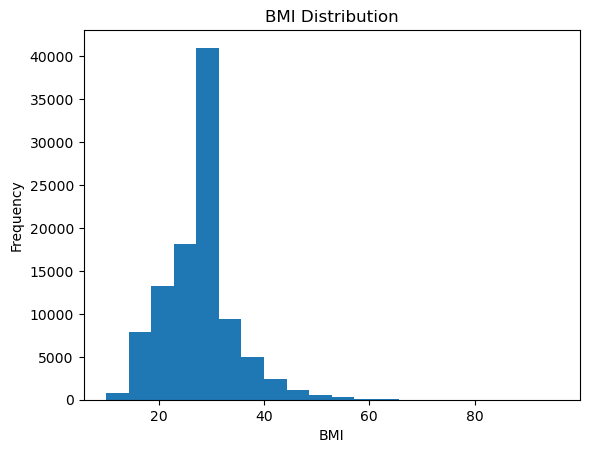

In [9]:
plt.hist(df['bmi'], bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distribution')
plt.show()


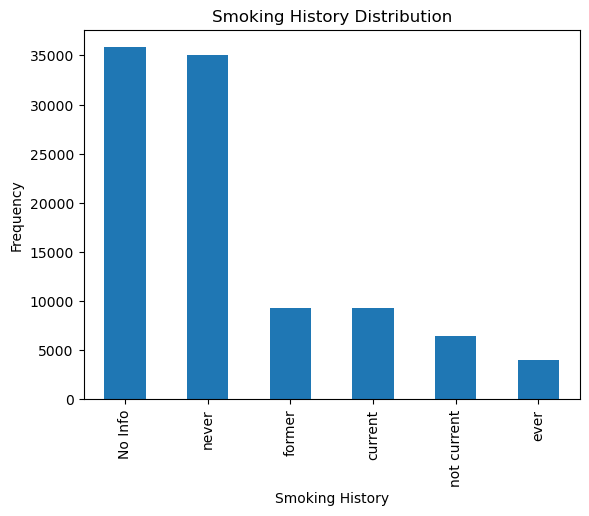

In [10]:
df['smoking_history'].value_counts().plot(kind='bar')
plt.xlabel('Smoking History')
plt.ylabel('Frequency')
plt.title('Smoking History Distribution')
plt.show()


In [11]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.251171       0.233354  0.337396   
hypertension         0.251171      1.000000       0.121262  0.147666   
heart_disease        0.233354      0.121262       1.000000  0.061198   
bmi                  0.337396      0.147666       0.061198  1.000000   
HbA1c_level          0.101354      0.080939       0.067589  0.082997   
blood_glucose_level  0.110672      0.084429       0.070066  0.091261   
diabetes             0.258008      0.197823       0.171727  0.214357   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.101354             0.110672  0.258008  
hypertension            0.080939             0.084429  0.197823  
heart_disease           0.067589             0.070066  0.171727  
bmi                     0.082997             0.091261  0.214357  
HbA1c_level             1.000000             0.166733  0.400660  
blood_glucose_level     0.1

In [12]:
matrix = df.drop('smoking_history', axis = 1)

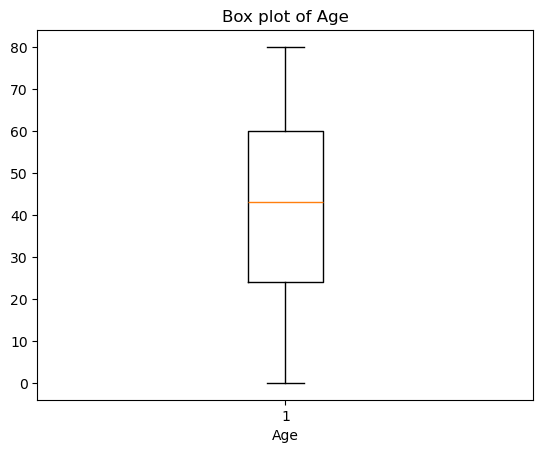

In [13]:
plt.boxplot(df['age'])
plt.xlabel('Age')
plt.title('Box plot of Age')
plt.show()

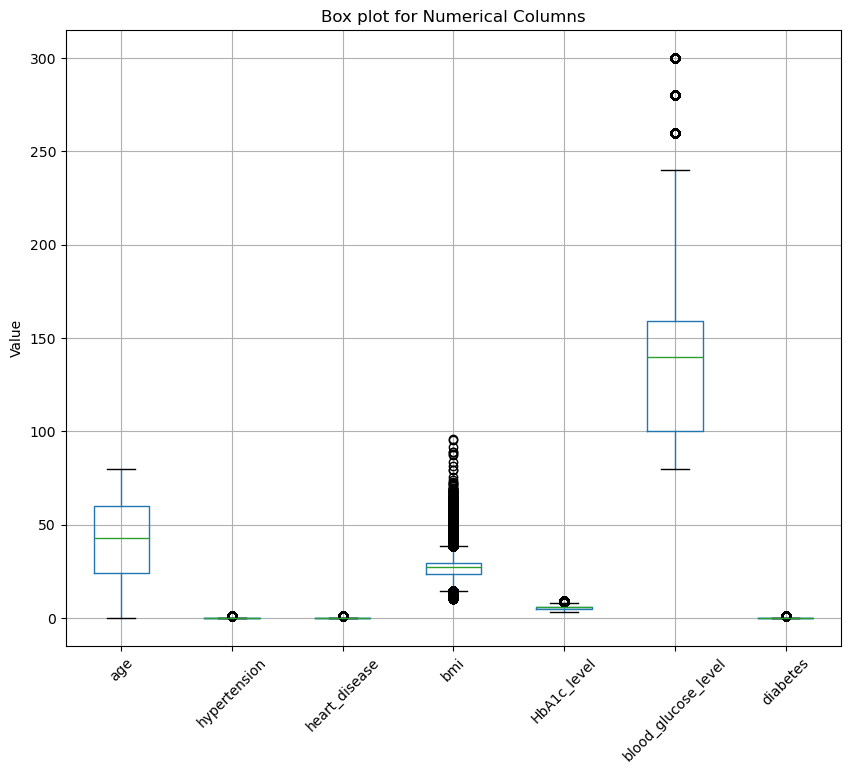

In [14]:
df.boxplot(rot=45, figsize=(10,8))
plt.title('Box plot for Numerical Columns')
plt.ylabel('Value')
plt.show()

<font size="4">Data Understanding and Cleaning</font>

In [15]:
df = df[df['gender']!='Other']

In [16]:
gender_column = df['gender']
label_encoder = LabelEncoder()
encoded_gender = label_encoder.fit_transform(gender_column)
df['gender'] = encoded_gender


/var/folders/7p/64wp09qn0338hn6j8c6ghcqw0000gn/T/ipykernel_79390/4221421484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'] = encoded_gender


In [17]:
df.gender.unique()

array([0, 1])

In [18]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,No Info,27.32,6.2,90,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


In [19]:
label_encoder.fit(df['gender'])
print(label_encoder.classes_)


[0 1]


In [20]:
df.gender.unique()

array([0, 1])

In [21]:
print(df['smoking_history'].unique())


['never' 'No Info' 'current' 'former' 'ever' 'not current']


In [22]:
encoded_smoking_history = pd.get_dummies(df['smoking_history'], prefix='smoking')


In [23]:
encoded_smoking_history = encoded_smoking_history.astype(int)


In [24]:
df.drop('smoking_history', axis=1, inplace=True)


/var/folders/7p/64wp09qn0338hn6j8c6ghcqw0000gn/T/ipykernel_79390/1063927752.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('smoking_history', axis=1, inplace=True)


In [25]:
df = pd.concat([df, encoded_smoking_history], axis=1)


In [26]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,1,0,0,0,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


In [27]:
columns_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

In [28]:
scaler = StandardScaler()


In [29]:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [30]:
df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current
0,0,1.692577,0,1,-0.321051,1.001692,0.047709,0,0,0,0,0,1,0
1,0,0.537899,0,0,-0.000114,1.001692,-1.426157,0,1,0,0,0,0,0
2,1,-0.616779,0,0,-0.000114,0.161089,0.489869,0,0,0,0,0,1,0
3,0,-0.261494,0,0,-0.583225,-0.492714,0.416175,0,0,1,0,0,0,0
4,1,1.514935,1,1,-1.081957,-0.679515,0.416175,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.692577,0,0,-0.000114,0.628091,-1.180513,0,1,0,0,0,0,0
99996,0,-1.771458,0,0,-1.499326,0.908292,-0.934869,0,1,0,0,0,0,0
99997,1,1.070828,0,0,0.076730,0.161089,0.416175,0,0,0,0,1,0,0
99998,0,-0.794422,0,0,1.220350,-1.426718,-0.934869,0,0,0,0,0,1,0


<font size="4">Model Development</font>

In [31]:
X = df.drop('diabetes', axis=1)

In [32]:
y = df['diabetes']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = xgb.predict(X_test)


In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9702955443316498


In [42]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9581070597362297


In [43]:
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Recall: 0.6957746478873239


In [44]:
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)


F1-score: 0.8061357702349868


In [45]:
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.846405598556767


In [50]:
cm = confusion_matrix(y_test, y_pred)

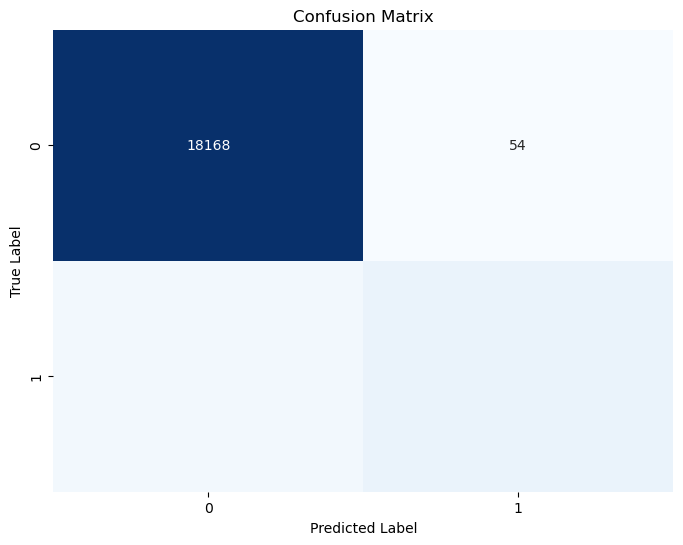

In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [52]:
cm

array([[18168,    54],
       [  540,  1235]])

In [53]:
df.diabetes.value_counts()

diabetes
0    91482
1     8500
Name: count, dtype: int64